In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [21]:
data = pd.read_csv('MD28 - Atletico Madrid 2-4 Barcelona.csv')

In [23]:
pd.set_option('display.max_columns', None)

In [25]:
data.head(10)

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/10/value,qualifier/11/value,qualifier/9/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/14/id,qualifier/14/qualifierId,qualifier/15/id,qualifier/15/qualifierId,qualifier/13/value,qualifier/15/value,assist,qualifier/16/id,qualifier/16/qualifierId,qualifier/16/value,qualifier/17/id,qualifier/17/qualifierId,qualifier/14/value,qualifier/17/value,teamName
0,2789548083,1,34,16,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T18:49:27.636Z,2025-03-16T19:55:46Z,5.588289e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",5.588289e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588289e+09,130.0,2,5.588289e+09,194.0,2yt9oajv9dkbju8tgy1g2nmqd,5.588289e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588289e+09,59.0,"13, 14, 23, 5, 24, 15, 22, 8, 19, 7, 12, 31, 1...",5.588289e+09,30.0,"2yt9oajv9dkbju8tgy1g2nmqd, amxunh6enoc99r07cp7...",5.588611e+09,197.0,24706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid
1,2789550031,1,34,16,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T18:52:01.844Z,2025-03-16T20:01:01Z,5.588300e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5...",5.588300e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588300e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588300e+09,130.0,8,5.588300e+09,194.0,2wl6h1rlrfnn2mr65vuo3t815,5.588623e+09,197.0,25288,5.588300e+09,30.0,"6ofu6yc2qwp5ii9cerdq1tk9h, cscn06kwqfzo09h0dc5...",5.588300e+09,59.0,"25, 23, 3, 8, 2, 5, 19, 17, 9, 20, 11, 35, 6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona
2,2789608419,2,32,1,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T20:02:54Z,5.588628e+09,127.0,Left to Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona
3,2789608431,2,32,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T22:55:52Z,5.588628e+09,127.0,Right to Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid
4,2789608439,3,1,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,50.1,49.9,2025-03-16T20:02:53.856Z,2025-03-16T20:02:57Z,5.588628e+09,212.0,16.4,5.588628e+09,140.0,35,5.588628e+09,56.0,Back,5.588628e+09,213.0,2.88,5.588628e+09,141.0,56.2,5.588628e+09,279.0,S,NaN,NaN,NaN,NaN,NaN,NaN,716n1970vi9rvw5b4w9qmjfth,A. Griezmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid
5,2789608471,4,1,1,0,3,4ku8o6uf87yd8iecdalipo6wd,1,35.0,55.3,2025-03-16T20:02:57.479Z,2025-03-16T20:03:02Z,5.588628e+09,212.0,27.1,5.588628e+09,140.0,31.8,5.588628e+09,56.0,Back,5.588628e+09,141.0,15.8,5.588628e+09,213.0

In [57]:
qualifier_id_cols = [col for col in data.columns if "/qualifierId" in col]
qualifier_value_cols = [col.replace("/qualifierId", "/value") for col in qualifier_id_cols]

data['end_x'] = np.nan
data['end_y'] = np.nan

for id_col, value_col in zip(qualifier_id_cols, qualifier_value_cols):
    data['end_x'] = data.apply(lambda row: row[value_col] if row[id_col] == 140 else row['end_x'], axis=1)
    data['end_y'] = data.apply(lambda row: row[value_col] if row[id_col] == 141 else row['end_y'], axis=1)

In [178]:
data['x'] = pd.to_numeric(data['x'], errors='coerce')
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data['end_x'] = pd.to_numeric(data['end_x'], errors='coerce')
data['end_y'] = pd.to_numeric(data['end_y'], errors='coerce')

In [180]:
data

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/10/value,qualifier/11/value,qualifier/9/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/14/id,qualifier/14/qualifierId,qualifier/15/id,qualifier/15/qualifierId,qualifier/13/value,qualifier/15/value,assist,qualifier/16/id,qualifier/16/qualifierId,qualifier/16/value,qualifier/17/id,qualifier/17/qualifierId,qualifier/14/value,qualifier/17/value,teamName,end_x,end_y
0,2789548083,1,34,16,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T18:49:27.636Z,2025-03-16T19:55:46Z,5.588289e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5...",5.588289e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588289e+09,130.0,2,5.588289e+09,194.0,2yt9oajv9dkbju8tgy1g2nmqd,5.588289e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588289e+09,59.0,"13, 14, 23, 5, 24, 15, 22, 8, 19, 7, 12, 31, 1...",5.588289e+09,30.0,"2yt9oajv9dkbju8tgy1g2nmqd, amxunh6enoc99r07cp7...",5.588611e+09,197.0,24706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,NaN,NaN
1,2789550031,1,34,16,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T18:52:01.844Z,2025-03-16T20:01:01Z,5.588300e+09,44.0,"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5...",5.588300e+09,227.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5.588300e+09,131.0,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0,...",5.588300e+09,130.0,8,5.588300e+09,194.0,2wl6h1rlrfnn2mr65vuo3t815,5.588623e+09,197.0,25288,5.588300e+09,30.0,"6ofu6yc2qwp5ii9cerdq1tk9h, cscn06kwqfzo09h0dc5...",5.588300e+09,59.0,"25, 23, 3, 8, 2, 5, 19, 17, 9, 20, 11, 35, 6, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,NaN,NaN
2,2789608419,2,32,1,0,0,agh9ifb2mw3ivjusgedj7c3fe,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T20:02:54Z,5.588628e+09,127.0,Left to Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,NaN,NaN
3,2789608431,2,32,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,0.0,0.0,2025-03-16T20:02:53.855Z,2025-03-16T22:55:52Z,5.588628e+09,127.0,Right to Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,NaN,NaN
4,2789608439,3,1,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,50.1,49.9,2025-03-16T20:02:53.856Z,2025-03-16T20:02:57Z,5.588628e+09,212.0,16.4,5.588628e+09,140.0,35,5.588628e+09,56.0,Back,5.588628e+09,213.0,2.88,5.588628e+09,141.0,56.2,5.588628e+09,279.0,S,NaN,NaN,NaN,NaN,NaN,NaN,716n1970vi9rvw5b4w9qmjfth,A. Griezmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,35.0,56.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [182]:
for data_subset in [passes]:
    data_subset[['x', 'y', 'end_x', 'end_y']] = data_subset[['x', 'y', 'end_x', 'end_y']].astype(float)

C:\Users\risha\AppData\Local\Temp\ipykernel_20048\694113916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[['x', 'y', 'end_x', 'end_y']] = data_subset[['x', 'y', 'end_x', 'end_y']].astype(float)


In [184]:
passes = data[data['typeId'] == 1]

In [186]:
passes

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/10/value,qualifier/11/value,qualifier/9/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/14/id,qualifier/14/qualifierId,qualifier/15/id,qualifier/15/qualifierId,qualifier/13/value,qualifier/15/value,assist,qualifier/16/id,qualifier/16/qualifierId,qualifier/16/value,qualifier/17/id,qualifier/17/qualifierId,qualifier/14/value,qualifier/17/value,teamName,end_x,end_y
4,2789608439,3,1,1,0,0,4ku8o6uf87yd8iecdalipo6wd,1,50.1,49.9,2025-03-16T20:02:53.856Z,2025-03-16T20:02:57Z,5.588628e+09,212.0,16.4,5.588628e+09,140.0,35,5.588628e+09,56.0,Back,5.588628e+09,213.0,2.88,5.588628e+09,141.0,56.2,5.588628e+09,279.0,S,NaN,NaN,NaN,NaN,NaN,NaN,716n1970vi9rvw5b4w9qmjfth,A. Griezmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,35.0,56.2
5,2789608471,4,1,1,0,3,4ku8o6uf87yd8iecdalipo6wd,1,35.0,55.3,2025-03-16T20:02:57.479Z,2025-03-16T20:03:02Z,5.588628e+09,212.0,27.1,5.588628e+09,140.0,31.8,5.588628e+09,56.0,Back,5.588628e+09,141.0,15.8,5.588628e+09,213.0,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9e7ybe0nsu3byq2tteey3zuy2,Pablo Barrios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,31.8,15.8
6,2789608479,5,1,1,0,8,4ku8o6uf87yd8iecdalipo6wd,1,31.4,13.3,2025-03-16T20:03:01.927Z,2025-03-16T20:03:04Z,5.588628e+09,141.0,30.8,5.588628e+09,56.0,Back,5.588628e+09,212.0,14.5,5.588628e+09,140.0,23.5,5.588628e+09,213.0,2.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amxunh6enoc99r07cp7qt621h,Marcos Llorente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,23.5,30.8
7,2789608505,6,1,1,0,10,4ku8o6uf87yd8iecdalipo6wd,1,23.2,30.6,2025-03-16T20:03:04.007Z,2025-03-16T20:03:08Z,5.588629e+09,141.0,44.4,5.588629e+09,213.0,2.56,5.588628e+09,56.0,Back,5.588629e+09,212.0,17,5.588628e+09,140.0,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6xulax65kp4aid70nk7g5jr2t,Robin Le Normand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,9.7,44.4
8,2789608525,7,1,1,0,14,4ku8o6uf87yd8iecdalipo6wd,1,7.2,41.7,2025-03-16T20:03:08.343Z,2025-03-16T20:03:12Z,5.588629e+09,157.0,NaN,5.588629e+09,1.0,NaN,5.588629e+09,140.0,37,5.588629e+09,212.0,38.3,5.588629e+09,141.0,9.1,5.588629e+09,213.0,5.67,5.588629e+09,56.0,Back,NaN,NaN,NaN,2yt9oajv9dkbju8tgy1g2nmqd,J. Oblak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,37.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2789681657,1038,1,2,95,55,agh9ifb2mw3ivjusgedj7c3fe,0,31.3,73.3,2025-03-16T21:59:31.853Z,2025-03-16T21:59:36Z,5.589033e+09,212.0,46,5.589033e+09,1.0,NaN,5.589033e+09,56.0,Left,5.589033e+09,5.0,NaN,5.589

In [188]:
final_third_line = 66.67

In [190]:
final_third_passes = passes[passes['x'] >= final_third_line]

In [192]:
final_third_passes

,id,eventId,typeId,periodId,timeMin,timeSec,contestantId,outcome,x,y,timeStamp,lastModified,qualifier/0/id,qualifier/0/qualifierId,qualifier/0/value,qualifier/1/id,qualifier/1/qualifierId,qualifier/1/value,qualifier/2/id,qualifier/2/qualifierId,qualifier/2/value,qualifier/3/id,qualifier/3/qualifierId,qualifier/3/value,qualifier/4/id,qualifier/4/qualifierId,qualifier/4/value,qualifier/5/id,qualifier/5/qualifierId,qualifier/5/value,qualifier/6/id,qualifier/6/qualifierId,qualifier/6/value,qualifier/7/id,qualifier/7/qualifierId,qualifier/7/value,playerId,playerName,keyPass,qualifier/8/id,qualifier/8/qualifierId,qualifier/8/value,qualifier/9/id,qualifier/9/qualifierId,qualifier/10/id,qualifier/10/qualifierId,qualifier/11/id,qualifier/11/qualifierId,qualifier/12/id,qualifier/12/qualifierId,qualifier/12/value,qualifier/10/value,qualifier/11/value,qualifier/9/value,qualifier/13/id,qualifier/13/qualifierId,qualifier/14/id,qualifier/14/qualifierId,qualifier/15/id,qualifier/15/qualifierId,qualifier/13/value,qualifier/15/value,assist,qualifier/16/id,qualifier/16/qualifierId,qualifier/16/value,qualifier/17/id,qualifier/17/qualifierId,qualifier/14/value,qualifier/17/value,teamName,end_x,end_y
29,2789608829,14,1,1,0,51,agh9ifb2mw3ivjusgedj7c3fe,1,74.3,59.9,2025-03-16T20:03:45.407Z,2025-03-16T20:03:47Z,5.588630e+09,212.0,4.4,5.588630e+09,140.0,73.2,5.588630e+09,213.0,4.44,5.588630e+09,56.0,Center,5.588630e+09,141.0,53.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2wl6h1rlrfnn2mr65vuo3t815,Raphinha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,73.2,53.7
49,2789609739,33,1,1,1,43,4ku8o6uf87yd8iecdalipo6wd,1,71.9,14.8,2025-03-16T20:04:37.383Z,2025-03-16T20:04:51Z,5.588635e+09,56.0,Center,5.588635e+09,140.0,86.3,5.588635e+09,213.0,0.43,5.588637e+09,154.0,NaN,5.588637e+09,210.0,13,5.588635e+09,212.0,16.6,5.588635e+09,141.0,24.9,NaN,NaN,NaN,716n1970vi9rvw5b4w9qmjfth,A. Griezmann,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Atletico Madrid,86.3,24.9
69,2789612715,35,1,1,2,57,agh9ifb2mw3ivjusgedj7c3fe,1,69.5,67.5,2025-03-16T20:05:51.760Z,2025-03-16T20:05:55Z,5.588650e+09,213.0,2.52,5.588650e+09,56.0,Center,5.588650e+09,140.0,64.4,5.588650e+09,141.0,73.2,5.588650e+09,212.0,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afxjicw89683nlpms9yy5x51x,Robert Lewandowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,64.4,73.2
98,2789614421,55,1,1,4,26,agh9ifb2mw3ivjusgedj7c3fe,1,67.7,21.2,2025-03-16T20:07:20.472Z,2025-03-16T20:07:23Z,5.588660e+09,212.0,36.4,5.588660e+09,1.0,NaN,5.588660e+09,140.0,55.8,5.588660e+09,141.0,71.5,5.588660e+09,213.0,1.92,5.588660e+09,56.0,Center,NaN,NaN,NaN,NaN,NaN,NaN,abr79wsl0folgkyvl821ggs2c,Lamine Yamal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,55.8,71.5
103,2789614627,60,1,1,4,44,agh9ifb2mw3ivjusgedj7c3fe,1,70.1,30.3,2025-03-16T20:07:38.448Z,2025-03-16T20:07:39Z,5.588662e+09,213.0,1.35,5.588661e+09,56.0,Center,5.588661e+09,141.0,42.8,5.588661e+09,140.0,71.9,5.588662e+09,212.0,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4gq1u1mqg0qzekh1u5djleeax,Dani Olmo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,71.9,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2789681027,678,1,2,94,25,4ku8o6uf87yd8iecdalipo6wd,1,77.1,9.4,2025-03-16T21:58:02.494Z,2025-03-16T21:58:04Z,5.589029e+09,212.0,16.9,5.589029e+09,140.0,88.2,5.589029e+09,141.0,27.4,5.589029e+09,213.0

In [202]:
forward_passes = final_third_passes[final_third_passes['end_x'] > 66.67]

In [204]:
home_forward_passes = forward_passes[forward_passes['teamName'] == 'Atletico Madrid']
away_forward_passes = forward_passes[forward_passes['teamName'] == 'Barcelona']

In [208]:
team_counts = forward_passes['teamName'].value_counts()
team_home = team_counts.get('Atletico Madrid', 0)
team_away = team_counts.get('Barcelona', 0)

In [210]:
team_home

62

In [212]:
team_away

216

In [214]:
if (team_home + team_home) > 0:
    field_tilt_home = (team_home / (team_home + team_away)) * 100
    field_tilt_away = 100 - field_tilt_home
    
else:
    field_tilt_home, field_tilt_away = 0, 0

In [216]:
field_tilt_home

22.302158273381295

In [218]:
field_tilt_away

77.6978417266187

In [264]:
home_successful_forward_passes = home_forward_passes[home_forward_passes['outcome'] == 1]
away_successful_forward_passes = away_forward_passes[away_forward_passes['outcome'] == 1]

In [276]:
home_success_count = len(home_successful_forward_passes)
home_unsuccess_count = len(home_forward_passes[home_forward_passes['outcome'] != 1])

away_success_count = len(away_successful_forward_passes)
away_unsuccess_count = len(away_forward_passes[away_forward_passes['outcome'] != 1])

In [282]:
home_success_count

34

In [284]:
home_unsuccess_count

28

In [286]:
away_success_count

171

In [288]:
away_unsuccess_count

45

Text(0.5, 1.0, 'FC BARCELONA')

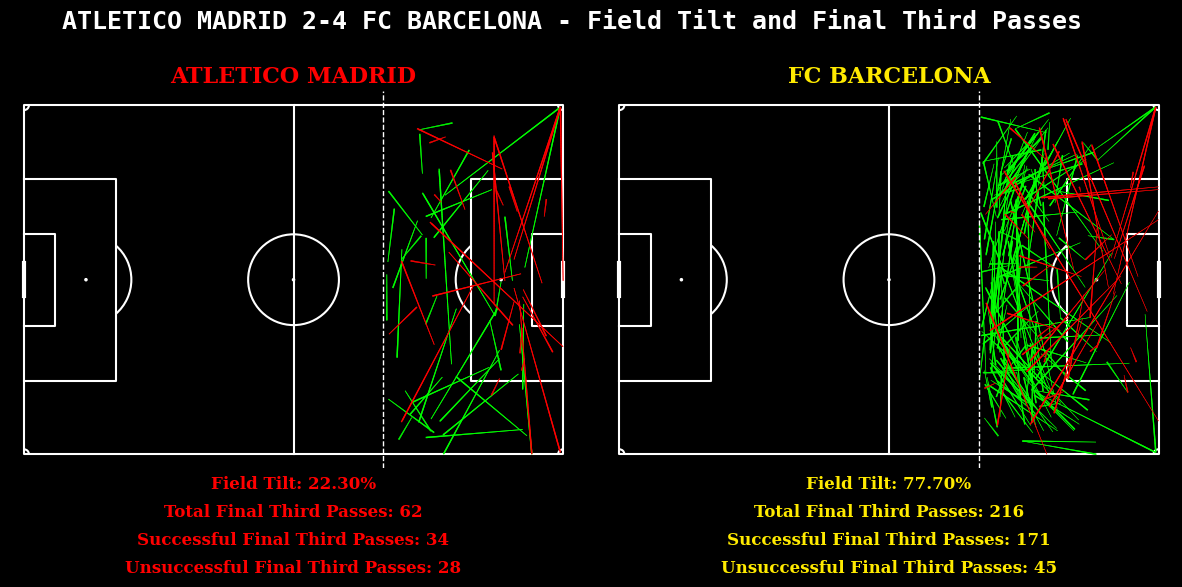

In [404]:
fig, axes = plt.subplots(1, 2, figsize=(15, 20))
plt.subplots_adjust(wspace=0.05)

fig.suptitle("ATLETICO MADRID 2-4 FC BARCELONA - Field Tilt and Final Third Passes", fontsize=18, color="white", weight="bold", fontfamily="monospace", y = 0.63)

pitch = Pitch(pitch_type='opta', pitch_color='black', line_color='white', linewidth=1.5, corner_arcs=True)
fig.set_facecolor('black')

pitch.draw(ax = axes[0])
for row in home_successful_forward_passes.itertuples(index=False):
    pitch.lines(row.x, row.y, row.end_x, row.end_y, color='#00ff00', comet=True, lw=0.5, ax=axes[0])

for row in home_forward_passes[home_forward_passes['outcome'] != 1].itertuples(index=False):
    pitch.lines(row.x, row.y, row.end_x, row.end_y, color='#ff0000', comet=True, lw=0.5, ax=axes[0])
    
axes[0].axvline(x=float(66.67), color='white', linestyle='dashed', linewidth=1)
axes[0].text(50, -10, f"Field Tilt: {field_tilt_home:.2f}%", fontsize=12, color="r", ha="center", fontfamily="serif", weight="bold")
axes[0].text(50, -18, f"Total Final Third Passes: {team_home}", fontsize=12, color="r", ha="center", fontfamily="serif", weight="bold")
axes[0].text(50, -26, f"Successful Final Third Passes: {home_success_count}", fontsize=12, color="r", ha="center", fontfamily="serif", weight="bold")
axes[0].text(50, -34, f"Unsuccessful Final Third Passes: {home_unsuccess_count}", fontsize=12, color="r", ha="center", fontfamily="serif", weight="bold")
axes[0].set_title("ATLETICO MADRID", fontsize=16, fontfamily = "serif", weight = 'bold', c = 'r')

pitch.draw(ax = axes[1])
for row in away_successful_forward_passes.itertuples(index=False):
    pitch.lines(row.x, row.y, row.end_x, row.end_y, color='#00ff00', comet=True, lw=0.3, ax=axes[1])

for row in away_forward_passes[away_forward_passes['outcome'] != 1].itertuples(index=False):
    pitch.lines(row.x, row.y, row.end_x, row.end_y, color='#ff0000', comet=True, lw=0.3, ax=axes[1])
    
axes[1].axvline(x=float(66.67), color='white', linestyle='dashed', linewidth=1)
axes[1].text(50, -10, f"Field Tilt: {field_tilt_away:.2f}%", fontsize=12, color="#ffea00", ha="center", fontfamily="serif", weight="bold")
axes[1].text(50, -18, f"Total Final Third Passes: {team_away}", fontsize=12, color="#ffea00", ha="center", fontfamily="serif", weight="bold")
axes[1].text(50, -26, f"Successful Final Third Passes: {away_success_count}", fontsize=12, color="#ffea00", ha="center", fontfamily="serif", weight="bold")
axes[1].text(50, -34, f"Unsuccessful Final Third Passes: {away_unsuccess_count}", fontsize=12, color="#ffea00", ha="center", fontfamily="serif", weight="bold")
axes[1].set_title("FC BARCELONA", fontsize=16, fontfamily = "serif", weight = 'bold', c = '#ffea00')